**Import all the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

**Loading the Dataset into DataFrame**

In [2]:
url = "https://raw.githubusercontent.com/ooseni/Hamoye-Datasets/main/Data_for_UCI_named.csv"

In [3]:
electrical_grid_data = pd.read_csv(url, sep=',', low_memory=False)
electrical_grid_data.describe(include='all')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unstable
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6380
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,NaN
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,NaN
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,NaN
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,NaN
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,NaN
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,NaN


In [4]:
df = electrical_grid_data

**Getting Information about the whole data**

In [5]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB
None


In [7]:
print('The shape of our features is:', df.shape)

The shape of our features is: (10000, 14)


## **Data Cleaning**

In [8]:
# Check for missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(29)

,Total,Percent
tau1,0,0.0
tau2,0,0.0
tau3,0,0.0
tau4,0,0.0
p1,0,0.0
p2,0,0.0
p3,0,0.0
p4,0,0.0
g1,0,0.0
g2,0,0.0


In [9]:
df.nunique()

tau1     10000
tau2     10000
tau3     10000
tau4     10000
p1       10000
p2       10000
p3       10000
p4       10000
g1       10000
g2       10000
g3       10000
g4       10000
stab     10000
stabf        2
dtype: int64

In [10]:
# Dropping stab and making 'stabf' the sole dependent variable
df.drop('stab', axis=1, inplace=True)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [11]:
# value count of 'stabf' in percentage
df['stabf'].value_counts() / df.shape[0]*100

unstable    63.8
stable      36.2
Name: stabf, dtype: float64

In [12]:
# Separate the target variable and rest of the variables using .iloc to subset the data
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [13]:
# Now we split our dataset into the training and testing dataset.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
# Now, we normalize our dataset to a common scale using the Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_train_df = scaler.fit_transform(x_train)
normalized_train_df = pd.DataFrame(normalized_train_df, columns=x_train.columns)

normalized_test_df = scaler.transform(x_test)
normalized_test_df = pd.DataFrame(normalized_test_df, columns=x_test.columns)

**MODEL-SELECTION & METRICS**

In [15]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=1)
forest_clf.fit(normalized_train_df, y_train)
forest_pred = forest_clf.predict(normalized_test_df)

In [16]:
# Classification Report
print(classification_report(y_test, forest_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [17]:
# Extra Tree Clasifier
from sklearn.ensemble import ExtraTreesClassifier
extra_trees_clf = ExtraTreesClassifier(random_state=1)
extra_trees_clf.fit(normalized_train_df, y_train)
extra_pred = extra_trees_clf.predict(normalized_test_df)

In [18]:
# Classification Report
print(classification_report(y_test, extra_pred, zero_division=True, digits=6))

              precision    recall  f1-score   support

      stable   0.940994  0.851124  0.893805       712
    unstable   0.921829  0.970497  0.945537      1288

    accuracy                       0.928000      2000
   macro avg   0.931411  0.910810  0.919671      2000
weighted avg   0.928652  0.928000  0.927121      2000



**Extreme Boosting Model**

In [19]:
# XGboost Classifier
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state=1)
xgb_clf.fit(normalized_train_df, y_train)
xgb_pred = xgb_clf.predict(normalized_test_df)

In [20]:
#Classification Report
print(classification_report(y_test, xgb_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



**Visualizing Boosting Tree and Feature Importance for Xgboost**

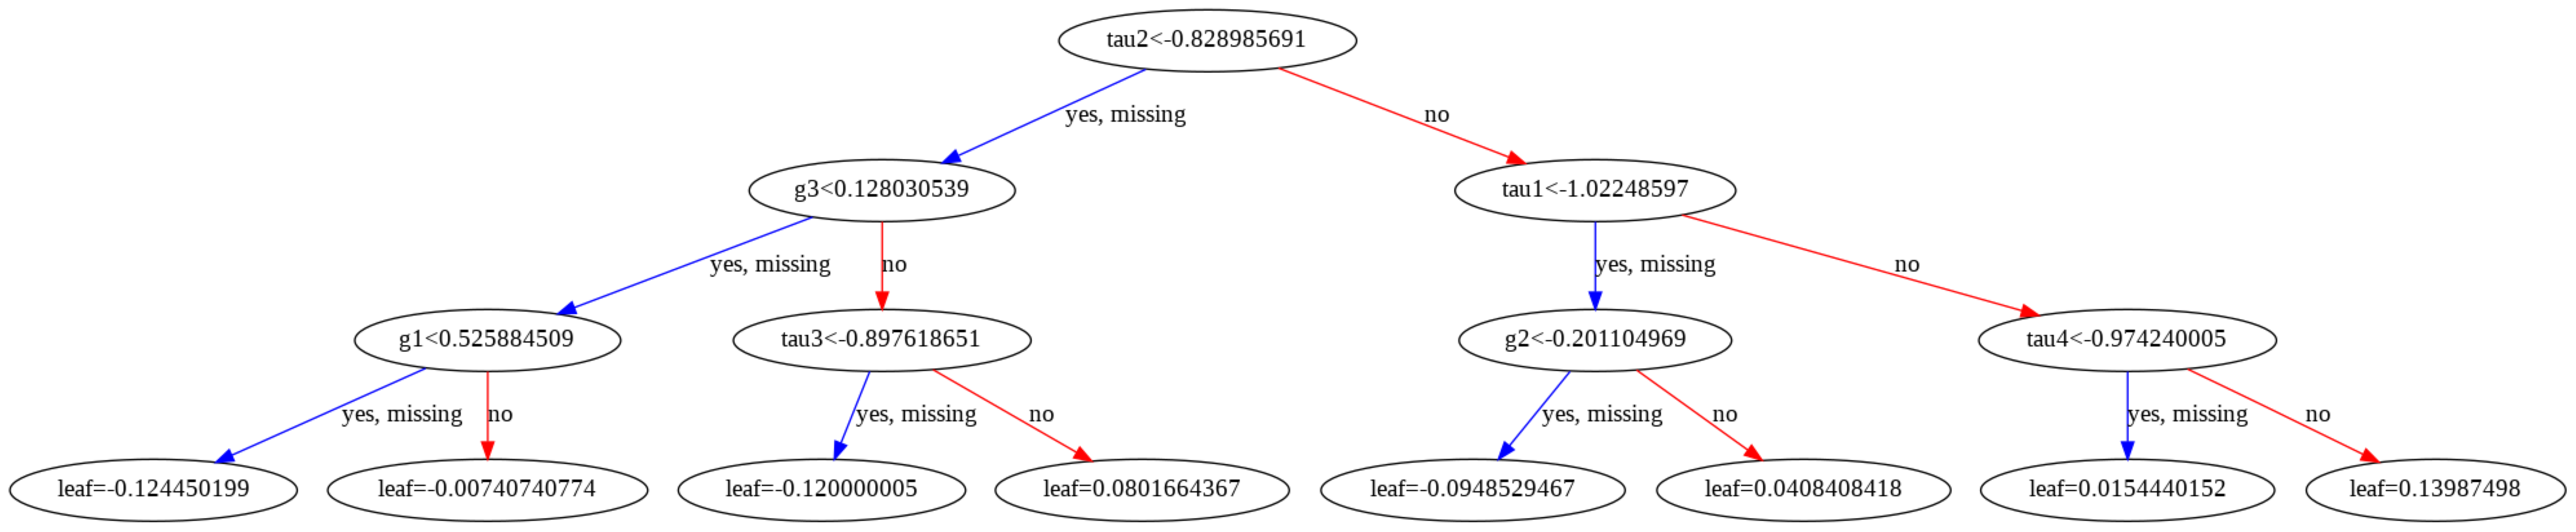

In [22]:
# Boosting Tree
import xgboost as xgb
xgb.plot_tree(xgb_clf,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 20]
plt.show()

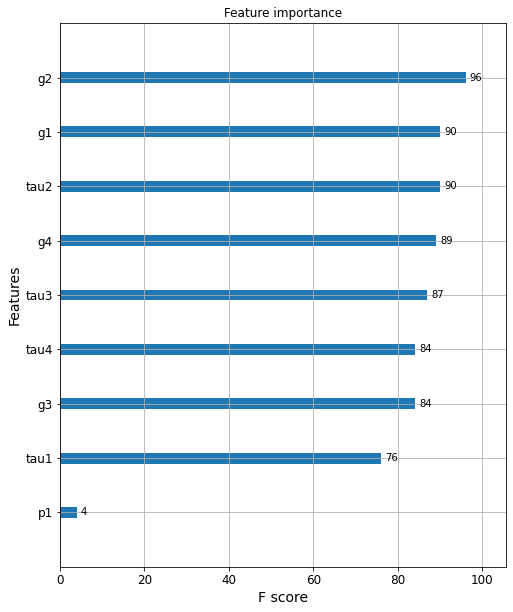

In [24]:
# Feature Importance
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [8, 10]
plt.show()

**Light Gradient Boosting Model**

In [25]:
# Lightgbm
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=1)
lgb.fit(normalized_train_df, y_train)
lgb_pred = lgb.predict(normalized_test_df)

In [26]:
# Classification Report
print(classification_report(y_test, lgb_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



**Hyper-Parameter Tuning**

In [27]:
# Initializing search space for Hyper-parameters
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 

In [28]:
# Making a dictionary of the grid
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [29]:
# Randomized Search Cross-Validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

extra_trees2 = ExtraTreesClassifier(random_state=1)

tuned_extra_trees = RandomizedSearchCV(extra_trees2, hyperparameter_grid, cv=5, n_iter=10, scoring= 'accuracy', n_jobs= -1, verbose=1, random_state=1)
search_result = tuned_extra_trees.fit(normalized_train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [30]:
# Checking for the best parameter for the model
search_result.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [31]:
# Fitting with this parameter to test the model's performance
hyper_tuned_tree = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, 
                                 min_samples_leaf=8, max_features=None, random_state=1)
hyper_tuned_tree.fit(normalized_train_df, y_train)
hyper_tuned_tree_pred = hyper_tuned_tree.predict(normalized_test_df)

In [32]:
# Classification report for this hyperparameter tuning
print(classification_report(y_test, hyper_tuned_tree_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



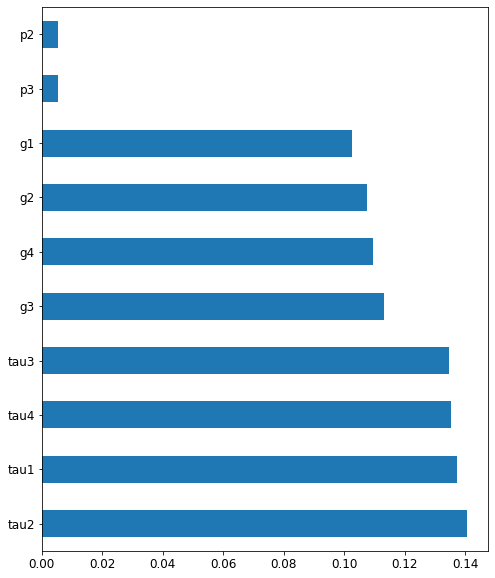

In [33]:
# Plot graph of feature importance
feat_importance = pd.Series(hyper_tuned_tree.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()